11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8720 - loss: 0.4516 - val_accuracy: 0.9693 - val_loss: 0.1044
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9662 - loss: 0.1137 - val_accuracy: 0.9707 - val_loss: 0.1039
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9776 - loss: 0.0739 - val_accuracy: 0.9740 - val_loss: 0.0922
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9830 - loss: 0.0532 - val_accuracy: 0.9747 - val_loss: 0.0845
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 0.9762 - val_loss: 0.0840
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.1005
Test Accuracy: 0.9743000268936157
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


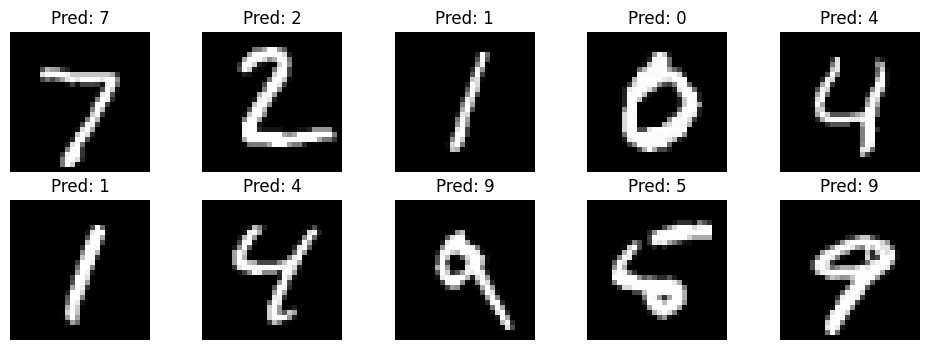

In [1]:
# Simple Neural Network for MNIST Handwritten Digit Recognition


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)


test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


predictions = model.predict(X_test)


plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Pred: " + str(predictions[i].argmax()))
    plt.axis('off')

plt.show()
